In [5]:
import pandas as pd
import seaborn as sns
import numpy as np


In [6]:
# loading the dataset
uber = pd.read_csv('Uber Request Data.csv')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [7]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
# Checking for missing values

In [9]:
uber.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [10]:
null_entries = uber[uber.isnull().any(axis=1)]
null_entries

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [11]:
uber['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [12]:
uber[uber['Status'] == 'Cancelled']

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,12/7/2016 7:20,NaN
4091,4158,City,299.0,Cancelled,14-07-2016 05:03:10,NaN
4092,4164,City,299.0,Cancelled,14-07-2016 05:06:40,NaN
4093,4448,City,299.0,Cancelled,14-07-2016 08:30:59,NaN


In [13]:
# Dataframe for compelted rides
completed = uber[uber['Status'] == 'Trip Completed']
completed

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,11/7/2016 22:54,11/7/2016 23:35
2827,2924,City,300.0,Trip Completed,13-07-2016 06:31:22,13-07-2016 07:20:52
2828,3324,Airport,300.0,Trip Completed,13-07-2016 12:33:21,13-07-2016 13:16:03
2829,3935,Airport,300.0,Trip Completed,13-07-2016 22:26:08,13-07-2016 23:43:13


## Creating additional columns for number of the day of the week, day of the week, day and hour

In [14]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Dayofweeknum'] = uber['Request timestamp'].dt.dayofweek
uber['Dayofweek'] = uber['Request timestamp'].dt.day_name()
uber['DayofMonth'] = uber['Request timestamp'].dt.day
uber['Hourofday'] = uber['Request timestamp'].dt.hour


In [15]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Dayofweeknum,Dayofweek,DayofMonth,Hourofday
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,0,Monday,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,0,Monday,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,2,Wednesday,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,2,Wednesday,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2,Wednesday,13,8
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN,4,Friday,15,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN,4,Friday,15,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN,4,Friday,15,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN,4,Friday,15,23


In [16]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
 6   Dayofweeknum       6745 non-null   int64         
 7   Dayofweek          6745 non-null   object        
 8   DayofMonth         6745 non-null   int64         
 9   Hourofday          6745 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 527.1+ KB


In [17]:
uber[uber['Dayofweek'] == 'Monday']

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Dayofweeknum,Dayofweek,DayofMonth,Hourofday
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,0,Monday,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,0,Monday,7,17
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,11/7/2016 7:25,0,Monday,7,6
18,535,Airport,3.0,Trip Completed,2016-11-07 10:00:00,11/7/2016 10:31,0,Monday,7,10
19,960,Airport,3.0,Trip Completed,2016-11-07 18:45:00,11/7/2016 19:23,0,Monday,7,18
...,...,...,...,...,...,...,...,...,...,...
4594,1355,Airport,NaN,No Cars Available,2016-11-07 23:45:00,NaN,0,Monday,7,23
4595,1352,Airport,NaN,No Cars Available,2016-11-07 23:49:00,NaN,0,Monday,7,23
4596,1357,City,NaN,No Cars Available,2016-11-07 23:52:00,NaN,0,Monday,7,23
4597,1358,City,NaN,No Cars Available,2016-11-07 23:57:00,NaN,0,Monday,7,23


In [18]:
uber.Dayofweek.value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: Dayofweek, dtype: int64

In [19]:
# Unique pickup points
uber['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

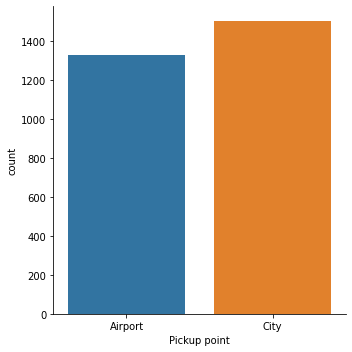

In [20]:
# Total completed rides for each pick up point
sns.catplot(x='Pickup point', data=completed, kind = 'count')

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

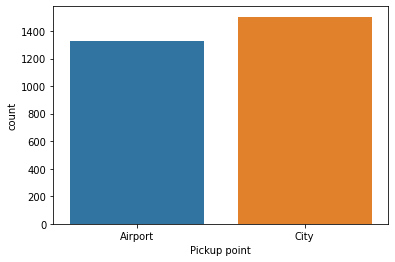

In [21]:
sns.countplot(x='Pickup point', data=completed)

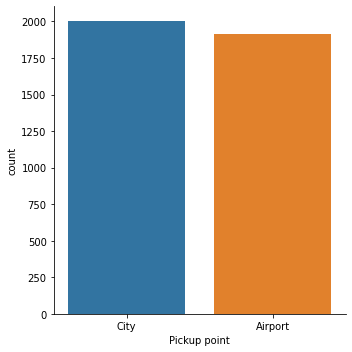

In [22]:
# total re1quested rides that were not completed, for each pick up point
sns.catplot(x='Pickup point', data=null_entries, kind='count')

In [23]:
#Pivot table for total requested rides for each day
uber_day_of_week = uber.pivot_table(
index=['Dayofweeknum', 'Dayofweek'],
    values='Pickup point',
    aggfunc='count'
)
uber_day_of_week

,,Pickup point
Dayofweeknum,Dayofweek,
0,Monday,1367
2,Wednesday,2644
3,Thursday,1353
4,Friday,1381


<AxesSubplot:xlabel='Dayofweeknum,Dayofweek'>

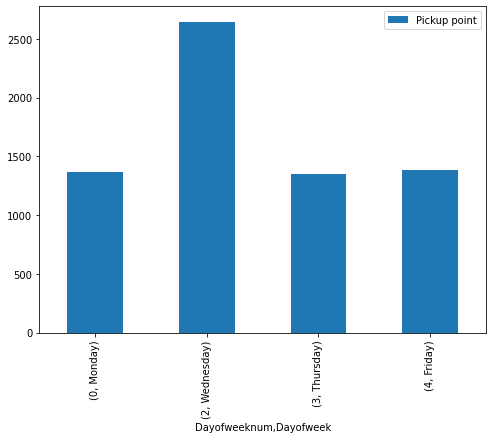

In [24]:
#visualizing as a barplot
uber_day_of_week.plot(kind='bar', figsize=(8, 6))

<AxesSubplot:xlabel='Hourofday'>

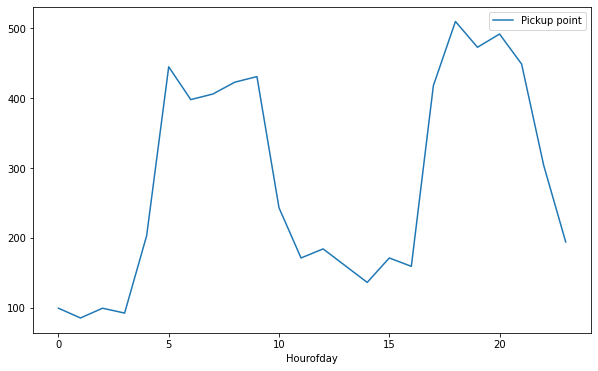

In [25]:
#pivot table for rides requested accoridng to the hour of the day and plot
uber_hourly_data = uber.pivot_table(
    index='Hourofday',
    values='Pickup point',
    aggfunc='count'
)
uber_hourly_data
uber_hourly_data.plot(kind='line', figsize=(10,6))

In [26]:
#pivot table for rides requested accordign to the day of the week and plot
uber_day_data = uber.pivot_table(
    index='DayofMonth',
    values='Pickup point',
    aggfunc='count'
)
uber_day_data

,Pickup point
DayofMonth,
7,2674
13,1337
14,1353
15,1381


<AxesSubplot:xlabel='DayofMonth'>

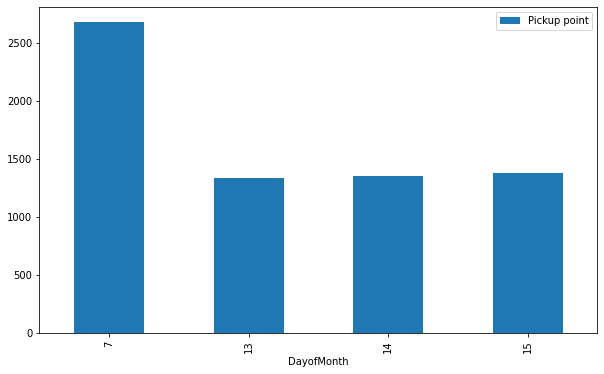

In [27]:
uber_day_data.plot(kind='bar', figsize=(10,6))

In [28]:
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Dayofweeknum', 'Dayofweek',
       'DayofMonth', 'Hourofday'],
      dtype='object')

In [29]:
uber.DayofMonth.value_counts()

7     2674
15    1381
14    1353
13    1337
Name: DayofMonth, dtype: int64